# Notebook to Look at SMELT merge results 


In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [3]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/base2/'
date = datetime.datetime(2016, 2, 7)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][23, :, :, :]
diatomF = ptrc_T.variables['PHY'][23, :, :, :]

initial = '/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/base/'
ni = results_dataset(initial, date, 1, '1h', 'ptrc_T')
nitrate0 = ni.variables['NO3'][23, :, :, :]
diatom0 = ni.variables['PHY'][23, :, :, :]

/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/base2/SalishSea_1h_20160207_20160207_ptrc_T.nc
/ocean/sallen/allen/research/MEOPAR/myResults/merge-apr2016-SMELT/base/SalishSea_1h_20160207_20160207_ptrc_T.nc


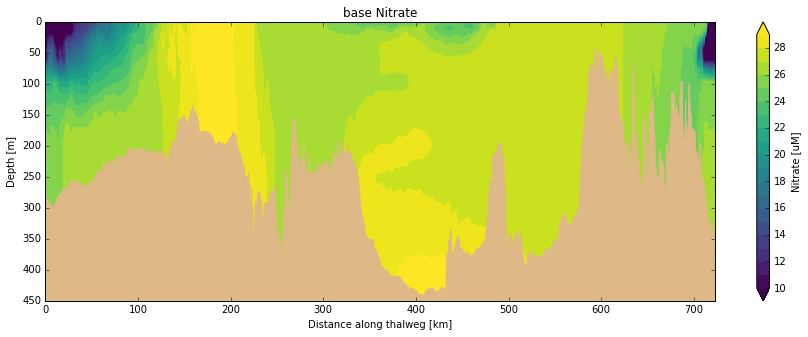

In [10]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(10., 30., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('base Nitrate')

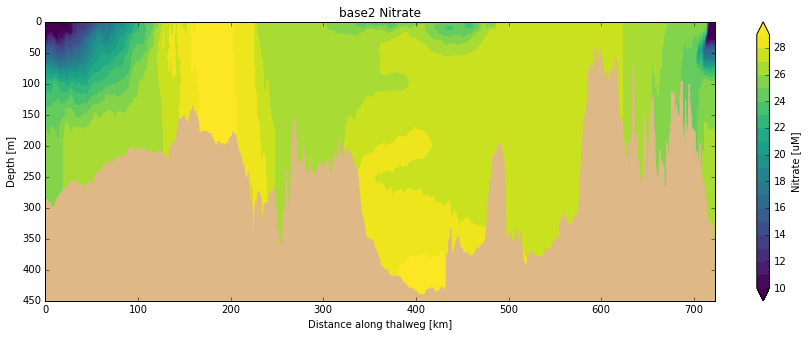

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('base2 Nitrate')

Nitrate max 12.2579 min -0.446459


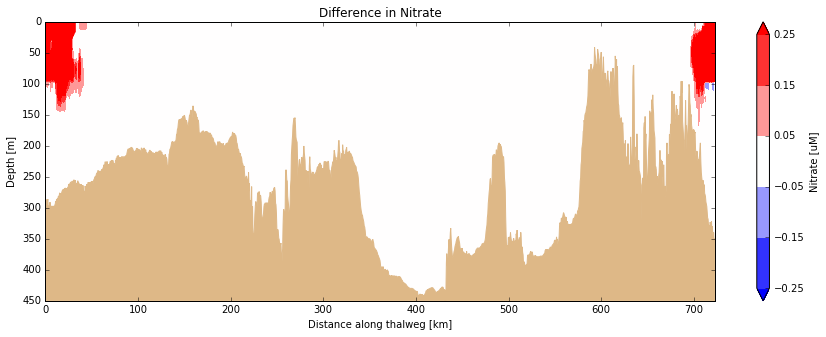

In [12]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.25, -0.15, -0.05, 0.05, 0.15, 0.25]
cbar = vis.contour_thalweg(ax, nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Difference in Nitrate')
print ("Nitrate", 'max', np.max(nitrateF[:,:]-nitrate0[:,:]), 
               'min', np.min(nitrateF[:,:]-nitrate0[:,:]))

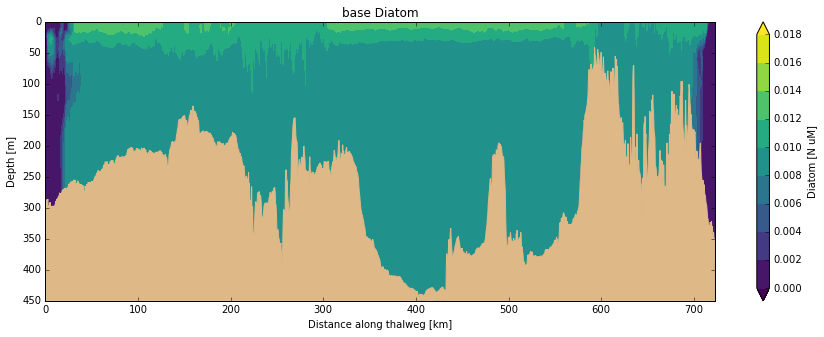

In [14]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title('base Diatom')

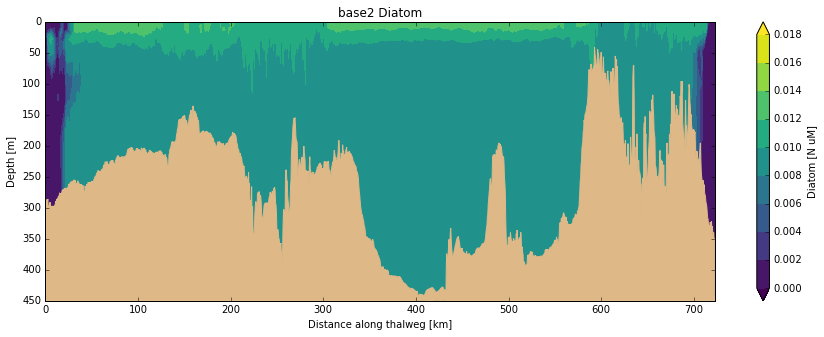

In [15]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 0.02, 0.002)
cbar = vis.contour_thalweg(ax, diatomF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title('base2 Diatom')

Diatom max 3.846e-05 min -6.36594e-06


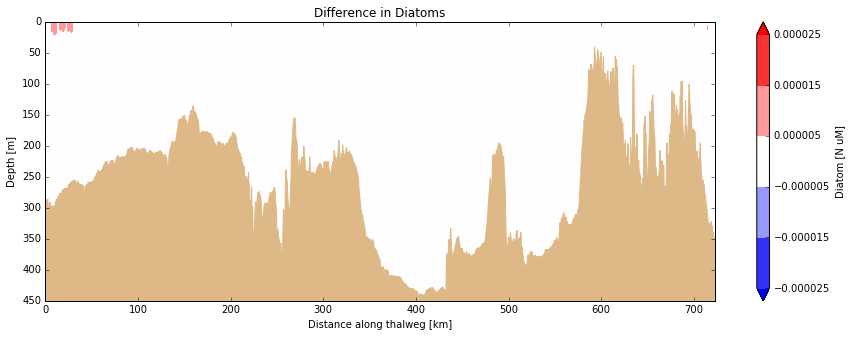

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = [-0.000025, -0.000015, -0.000005, 0.000005, 0.000015, 0.000025]
cbar = vis.contour_thalweg(ax, diatomF-diatom0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax.set_ylim([450,0])
cbar.set_label('Diatom [N uM]')
ax.set_title('Difference in Diatoms')
print ("Diatom", 'max', np.max(diatomF[:,:]-diatom0[:,:]), 
               'min', np.min(diatomF[:,:]-diatom0[:,:]))